In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import os
from os import path
from scipy.signal import find_peaks, peak_prominences, find_peaks_cwt
print(os.getcwd())
root = '/project/wyin/jlee/ml-project'
data_loc = path.join(root, 'inverse-shifted/data')

/project/wyin/jlee/ml-project/inverse-shifted/data-analysis


In [2]:
train_set = np.load(path.join(data_loc, "train-set.npz"))
print(train_set['dos'].shape)

val_set = np.load(path.join(data_loc, "val-set.npz"))
print(val_set['dos'].shape)

test_set = np.load(path.join(data_loc, "test-set.npz"))
print(test_set['dos'].shape)

print(test_set['params'][0])

(25534, 354)
(3103, 354)
(3238, 354)
[-0.06   0.24   0.376]


In [3]:
all_dos = np.zeros((25, 25, 51, 354))

def load_dos(dataset):
    params_arr = dataset['params']
    dos_arr = dataset['dos']
    
    for i, params in enumerate(params_arr):
        t1_ind = round((params[0] + 0.5) * 50)
        t2_ind = round((params[1] - 0.02) * 50)
        j_ind = round((params[2] - 0.2) * 62.5)
        
        all_dos[t1_ind, t2_ind, j_ind] = dos_arr[i]
        
        if (i % 10000) == 0:
            print(i)

In [4]:
load_dos(train_set)

0
10000
20000


In [8]:
load_dos(val_set)
load_dos(test_set)

0
0


In [17]:
def plot_dos(ax, file_path):
    dos = np.loadtxt(os.path.join(file_path, 'dos.dat'))
    ax.set_ylim([0, 1.5])
    ax.plot(dos[:,0], dos[:,1])
    
#     spectrum = dos[:,1]
#     peaks, _ = find_peaks(spectrum)
#     prom = peak_prominences(spectrum, peaks)[0]
#     bottom = spectrum[peaks] - prom

#     ax.plot(spectrum)
#     ax.scatter(peaks, spectrum[peaks], color = 'orange')

#     ax.vlines(x=peaks, ymin=bottom, ymax=spectrum[peaks], color = 'orange')
    
    
def plot_all(t1, t2, j):
    fig, ax = plt.subplots(figsize=(15, 5))
    file_path = os.path.join(data_loc, f'param_{t1:.2f}_{t2:.2f}_{j:.3f}')
    
    plot_dos(ax, file_path)
interact(plot_all, t1 = (-0.50, -0.02, 0.02), t2 = (0.02, 0.50, 0.02), j = (0.2, 1.0, 0.016))

interactive(children=(FloatSlider(value=-0.26, description='t1', max=-0.02, min=-0.5, step=0.02), FloatSlider(…

<function __main__.plot_all(t1, t2, j)>

In [9]:
def plot_all(t1, t2, j):
    plt.figure(figsize = (15, 5))
    #plt.ylim([0, 1.5])
    
    t1_ind = round((t1 + 0.5) * 50)
    t2_ind = round((t2 - 0.02) * 50)
    j_ind = round((j - 0.2) * 62.5)
    plt.plot(np.linspace(-4.36, 9.76, 354), all_dos[t1_ind, t2_ind, j_ind])
    
interact(plot_all, t1 = (-0.50, -0.02, 0.02), t2 = (0.02, 0.50, 0.02), j = (0.2, 1.0, 0.016))

interactive(children=(FloatSlider(value=-0.26, description='t1', max=-0.02, min=-0.5, step=0.02), FloatSlider(…

<function __main__.plot_all(t1, t2, j)>

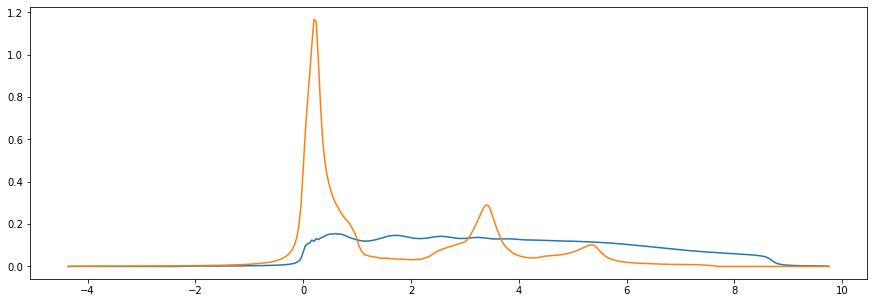

In [8]:
plt.figure(figsize = (15, 5))
t1_ind = round((-0.5 + 0.5) * 50)
t2_ind = round((0.5 - 0.02) * 50)
j_ind = round((0.2 - 0.2) * 62.5)

plt.plot(np.linspace(-4.36, 9.76, 354), all_dos[t1_ind, t2_ind, j_ind])

t1_ind = round((-0.02 + 0.5) * 50)
t2_ind = round((0.02 - 0.02) * 50)
j_ind = round((1.0 - 0.2) * 62.5)
    
plt.plot(np.linspace(-4.36, 9.76, 354), all_dos[t1_ind, t2_ind, j_ind])